## Importanto dependências

In [1]:
from matplotlib import font_manager

import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Baixando datasets (Windows)

In [56]:
!pip install -q kaggle

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [92]:
!cp ~/Downloads/kaggle.json %HOME%/.kaggle/kaggle.json

In [93]:
DATADIR="data"
![ ! -d "$DATADIR" ] && mkdir "$DATADIR"

!kaggle datasets download -d anokas/kuzushiji -p "$DATADIR" --unzip


  0%|          | 0.00/571M [00:00<?, ?B/s]
  0%|          | 1.00M/571M [00:00<03:14, 3.08MB/s]
  0%|          | 2.00M/571M [00:00<02:09, 4.61MB/s]
  1%|          | 3.00M/571M [00:00<01:50, 5.39MB/s]
  1%|          | 4.00M/571M [00:00<01:44, 5.70MB/s]
  1%|          | 5.00M/571M [00:01<02:01, 4.88MB/s]
  1%|1         | 6.00M/571M [00:01<02:13, 4.44MB/s]
  1%|1         | 7.00M/571M [00:01<02:09, 4.56MB/s]
  1%|1         | 8.00M/571M [00:01<01:58, 4.97MB/s]
  2%|1         | 9.00M/571M [00:01<01:56, 5.04MB/s]
  2%|1         | 10.0M/571M [00:02<02:37, 3.73MB/s]
  2%|1         | 11.0M/571M [00:02<02:18, 4.25MB/s]
  2%|2         | 12.0M/571M [00:02<02:05, 4.69MB/s]
  2%|2         | 13.0M/571M [00:02<01:53, 5.13MB/s]
  2%|2         | 14.0M/571M [00:03<01:48, 5.40MB/s]
  3%|2         | 15.0M/571M [00:03<01:41, 5.76MB/s]
  3%|2         | 16.0M/571M [00:03<01:37, 5.96MB/s]
  3%|2         | 17.0M/571M [00:03<01:35, 6.06MB/s]
  3%|3         | 18.0M/571M [00:03<01:35, 6.04MB/s]
  3%|3         | 19.

 48%|####7     | 272M/571M [00:51<01:23, 3.73MB/s]
 48%|####7     | 273M/571M [00:51<01:21, 3.84MB/s]
 48%|####8     | 274M/571M [00:51<01:11, 4.36MB/s]
 48%|####8     | 275M/571M [00:51<01:05, 4.74MB/s]
 48%|####8     | 276M/571M [00:51<01:01, 5.06MB/s]
 49%|####8     | 277M/571M [00:52<00:57, 5.35MB/s]
 49%|####8     | 278M/571M [00:52<00:54, 5.68MB/s]
 49%|####8     | 279M/571M [00:52<00:51, 5.93MB/s]
 49%|####9     | 280M/571M [00:52<00:48, 6.25MB/s]
 49%|####9     | 281M/571M [00:52<00:48, 6.28MB/s]
 49%|####9     | 282M/571M [00:52<00:47, 6.37MB/s]
 50%|####9     | 283M/571M [00:53<00:47, 6.37MB/s]
 50%|####9     | 284M/571M [00:53<00:46, 6.41MB/s]
 50%|####9     | 285M/571M [00:53<00:45, 6.59MB/s]
 50%|#####     | 286M/571M [00:53<00:45, 6.58MB/s]
 50%|#####     | 287M/571M [00:53<00:44, 6.66MB/s]
 50%|#####     | 288M/571M [00:53<00:44, 6.67MB/s]
 51%|#####     | 289M/571M [00:54<00:44, 6.61MB/s]
 51%|#####     | 290M/571M [00:54<00:44, 6.64MB/s]
 51%|#####     | 291M/571M [00:

## Instalando fontes e adicionando ao matplotlib (Windows)

In [6]:
system = platform.system()

# TESTAR VARIÁVEL DE AMBIENTE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
if system == 'Windows':
    font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
    font_manager.fontManager.addfont('C:\\Users\\medin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\TakaoPGothic.ttf')
    plt.rcParams['font.family'] = 'TakaoPGothic'
    
    # Check if the font is installed
    font_manager.findfont("TakaoPGothic")
# !ls C:\\Users\\medin\\anaconda3\\envs\\vision\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf
elif system == 'Linux':
    pass

## Baixando datasets (Linux)

## Instalando fontes e adicionando ao matplotlib (Linux)

---
## Pré-processamento dos dados

### Carregando dados e separando conjuntos de treino e teste

In [95]:
# Loading data from compressed files
x_train = np.load('data\\k49-train-imgs.npz')['arr_0'].astype('float32')
x_test = np.load('data\\k-49-test-imgs.npz')['arr_0'].astype('float32')

# Normalize data between 0 and 1
x_train /= 255
x_test /= 255

# Adding one extra "channel" dimension
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)

print(f'Original training data shape: {x_train.shape} - Expanded training data shape: {x_train_expanded.shape}')
print(f'Original testing data shape: {x_test.shape}   -  Expanded testing data shape: {x_test_expanded.shape}\n')

print('Number of training samples: ', x_train.shape[0])
print('Number of testing samples: ', x_test.shape[0], end='\n\n')

print(f'Images resolution: {x_train.shape[1]}x{x_train.shape[2]}')

Original training data shape: (232365, 28, 28) - Expanded training data shape: (232365, 28, 28, 1)
Original testing data shape: (38547, 28, 28)   -  Expanded testing data shape: (38547, 28, 28, 1)

Number of training samples:  232365
Number of testing samples:  38547

Images resolution: 28x28


In [97]:
# Loading labels from compressed files
y_train_original = np.load('data\k49-train-labels.npz')['arr_0']
y_test_original = np.load('data\k49-test-labels.npz')['arr_0']

print('Number of training labels: ', y_train_original.shape[0])
print('Number of testing labels: ', y_test_original.shape[0], end='\n\n')

n_classes = len(np.unique(y_train_original))
print('Number of classes: ', n_classes)

# One hot encoding for cross entropy loss (for later when training the model)
y_train = np_utils.to_categorical(y_train_original, n_classes)
y_test = np_utils.to_categorical(y_test_original, n_classes)

Number of training labels:  232365
Number of testing labels:  38547

Number of classes:  49


### Visualizando dados

In [9]:
# Loading classmap
df = pd.read_csv('data\k49_classmap.csv')
class_to_hiragana = df.to_dict(orient='index')

In [121]:
def get_hiragana(key):
  return class_to_hiragana[key]['char']

def visualize_random_hiraganas(x, y, n_cols=10, n_rows=5):
  n_imgs = n_cols * n_rows
  rand_idxs = np.random.randint(x.shape[0], size=n_imgs)

  rand_samples = x[rand_idxs]
  x = [get_hiragana(y[idx]) for idx in rand_idxs]

  fig = plt.figure(figsize=(n_cols, n_rows))
  plt.subplots_adjust(top=1)

  for i in range(n_imgs):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.set_title(x[i])

    ax.tick_params(
      axis='both',
      which='both',
      labelleft=False,
      labelbottom=False,
      bottom=False,
      left=False
    )
    
    ax.imshow(rand_samples[i], cmap='gray')

  plt.savefig(f'plots/{n_imgs}_random_samples', transparent=True)
  plt.show()

def visualize_classes_inbalance(y, title=None):
  classes, frequencies = np.unique(y, return_counts=True)
  sorted_lists = sorted(zip(frequencies, classes))
  frequencies, classes = [list(pair) for pair in  zip(*sorted_lists)]

  hiraganas = [get_hiragana(class_) for class_ in classes]

  fig = plt.figure(figsize=(10, 5))
  ax1 = fig.add_subplot(111)
  ax1.scatter(hiraganas, frequencies)

  title = title or 'classes_inbalance'
  plt.savefig(f'plots/{title}', transparent=True)
  plt.show()

def visualize_same_class_samples(x, y, n_classes=5, n_samples=5):
  n_rows = n_classes
  n_columns = n_samples

  np.random.seed()

  classes_range = np.unique(y) # 0 a 48
  rand_classes = np.random.randint(classes_range[0], classes_range[-1], size=n_rows)

  fig = plt.figure(figsize=(n_columns, n_rows), dpi=100)
  plt.subplots_adjust(top=1)
  
  n_imgs = n_rows + n_columns  
  i = 1
  while i <= n_imgs:
    for class_ in rand_classes:
      rand_class_idxs = np.where(y == class_)[0][:n_columns]
      for sample_idx in rand_class_idxs:
        ax = fig.add_subplot(n_rows, n_columns, i)
        ax.set_title(get_hiragana(class_))

        ax.tick_params(
          axis='both',
          which='both',
          labelleft=False,
          labelbottom=False,
          bottom=False,
          left=False
        )
        
        ax.imshow(x[sample_idx], cmap='gray')
        i += 1
        
  plt.savefig(f'plots/{n_rows}_classes_train_samples', transparent=True)
  plt.show()

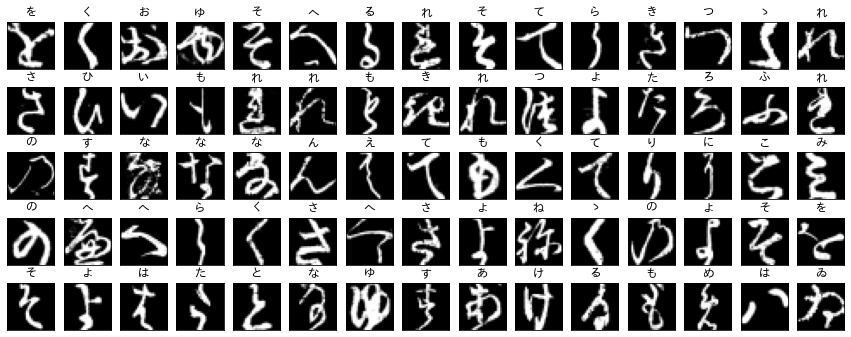

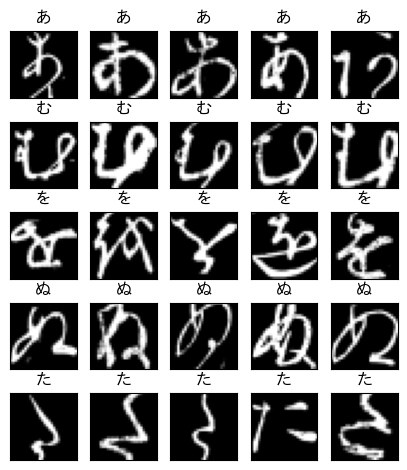

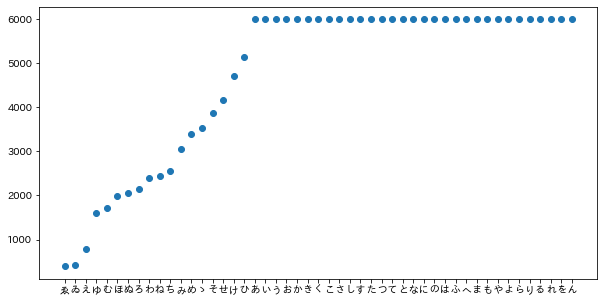

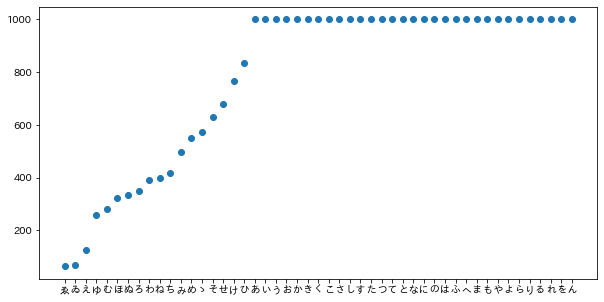

In [122]:
if not os.path.isdir('plots'):
    os.mkdir('plots')

visualize_random_hiraganas(x_train, y_train_original, n_cols=15)
visualize_same_class_samples(x_train, y_train_original)
visualize_classes_inbalance(y_train_original, title='classes_inbalance_train_samples')
visualize_classes_inbalance(y_test_original, title='classes_inbalance_test_samples')

---
## Treinamento

### Criando modelos
A ideia é treinar vários modelos com diferentes parâmetros (número de camadas, filtros, tamanho dos filtros, otimizadores, etc) e comparar a acurácia obtida no conjunto de teste por cada modelo.

Como os modelos possuem arquiteturas similares (e.g.: as redes neurais convolucionais sempre possuem uma cada convolucional seguida de uma de max pooling) foram criadas duas funções, **build_cnn** e **build_nn** para gerar modelos, dados os parâmetros necessários.

In [20]:
def build_cnn(name, input_layer, conv_layers, pooling_layers, classification_layer, compilation_params, show_summary=False):
    model = models.Sequential(name=name)
    
    model.add(layers.Conv2D(**input_layer))
    
    for conv, pool in zip(conv_layers, pooling_layers):
        model.add(layers.Conv2D(**conv))
        model.add(layers.MaxPooling2D(**pool))
        
    # Get characteristics vector
    model.add(layers.Flatten())
                  
    # Tenho que relembrar exatamente o pq dessa camada
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(**classification_layer))
    
    if show_summary:
        model.summary()
    
    model.compile(**compilation_params)
    
    return model

def build_nn(name, nn_layers, compilation_params, show_summary=False):
    model = keras.Sequential(
        [layers.Dense(**layer) for layer in nn_layers],
        name
    )
    
    model.compile(**compilation_params)
    
    if show_summary:
        model.summary()
    
    return model

### Modelos
Os modelos consistem em 4 redes neurais e 6 redes neurais convolucionais.

#### Redes Neurais
A única diferença entre as redes, NN_1_sgd e NN_2_sgd, é uma camada de 128 neurônios antes da camada de classificação; e como o nome delas diz, ambas usam o algoritmo **sgd** (Gradiente Descendente Estocástico) como otimizador, e a função de perda de Entropia Cruzada Categórica.
O mesmo vale para as redes NN_1_adam e NN_2_adam, com a única diferença que essas redes usam o otimizador Adam.

Obs.: é importante notar que esses modelos usam os otimizadores e funções de perda padrões fornecidos pelo Keras. Após o treinamento dessas redes, são criadas novas redes usando parâmetros diferentes para os otimizadores e funções de perda.

#### Redes Neurais Convolucionais


In [151]:
neural_networks = [
    build_nn(
        'NN_1_sgd',
        [
            {'units': 64, 'activation': 'relu', 'name': 'inputs', 'input_shape': (784,)},
            {'units': 64, 'activation': 'relu', 'name': 'dense_1'},
            {'units': n_classes, 'activation': 'softmax', 'name': 'predictions'}
        ],
        {'optimizer': 'sgd', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']},
    ),
    build_nn(
        'NN_2_sgd',
        [
            {'units': 64, 'activation': 'relu', 'name': 'inputs', 'input_shape': (784,)},
            {'units': 64, 'activation': 'relu', 'name': 'dense_1'},
            {'units': 128, 'activation': 'relu', 'name': 'dense_2'},
            {'units': n_classes, 'activation': 'softmax', 'name': 'predictions'}
        ],
        {'optimizer': 'sgd', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']},
    ),
    build_nn(
        'NN_1_adam',
        [
            {'units': 64, 'activation': 'relu', 'name': 'inputs', 'input_shape': (784,)},
            {'units': 64, 'activation': 'relu', 'name': 'dense_1'},
            {'units': n_classes, 'activation': 'softmax', 'name': 'predictions'}
        ],
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']},
    ),
    build_nn(
        'NN_2_adam',
        [
            {'units': 64, 'activation': 'relu', 'name': 'inputs', 'input_shape': (784,)},
            {'units': 64, 'activation': 'relu', 'name': 'dense_1'},
            {'units': 128, 'activation': 'relu', 'name': 'dense_2'},
            {'units': n_classes, 'activation': 'softmax', 'name': 'predictions'}
        ],
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']},
    ),
    build_nn(
        'NN_2_super_dense',
        [
            {'units': 64, 'activation': 'relu', 'name': 'inputs', 'input_shape': (784,)},
            {'units': 128, 'activation': 'relu', 'name': 'dense_1'},
            {'units': 256, 'activation': 'relu', 'name': 'dense_2'},
            {'units': n_classes, 'activation': 'softmax', 'name': 'predictions'}
        ],
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']},
    )
]

conv_neural_networks = [
    build_cnn(
        'CNN_1_adam',
        {'filters': 64, 'kernel_size': 3, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 64, 'kernel_size': 3},
            {'filters': 64, 'kernel_size': 3}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    ),
    build_cnn(
        'CNN_2_adam',
        {'filters': 64, 'kernel_size': 3, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 128, 'kernel_size': 3},
            {'filters': 256, 'kernel_size': 3}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    ),
    build_cnn(
        'CNN_1_sgd',
        {'filters': 64, 'kernel_size': 3, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 64, 'kernel_size': 3},
            {'filters': 64, 'kernel_size': 3}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'sgd', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    ),
    build_cnn(
        'CNN_2_sgd',
        {'filters': 64, 'kernel_size': 3, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 128, 'kernel_size': 3},
            {'filters': 256, 'kernel_size': 3}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'sgd', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    ),
    build_cnn(
        'CNN_1_even_kernels_size',
        {'filters': 64, 'kernel_size': 2, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 64, 'kernel_size': 2},
            {'filters': 64, 'kernel_size': 2}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'sgd', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    ),
    build_cnn(
        'CNN_2',
        {'filters': 64, 'kernel_size': 4, 'activation': 'relu', 'input_shape': (28,28,1)},
        [
            {'filters': 64, 'kernel_size': 4},
            {'filters': 64, 'kernel_size': 4}
        ],
        [
            {'pool_size': 2},
            {'pool_size': 2}
        ],
        {'units': n_classes, 'activation': 'softmax'},
        {'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'metrics': ['accuracy']}
    )
]

## Treinamento
O treinamento consiste em fazer o fit de cada modelo no conjunto de treino, separando 30% desse conjunto para validação e usando batches com 128 samples. Após o treinamento são salvos os pesos para que o treinamento não precise ser executado novamente no futuro, mas apenas carregado (vide seção [Carregando Modelos](#carregando-modelos) abaixo).

In [22]:
def train_model(model, training_params):
    model.fit(**training_params)
    
    if not os.path.isdir('weights'):
        os.mkdir('weights')
        
    model.save_weights(os.path.join('weights', f'{model.name}.h5'))
    
    return model

def flatten(x):
    n_samples, width, height, _ = x.shape
    
    return np.reshape(x, (n_samples, width*height))

In [39]:
x_train_flattened = flatten(x_train_expanded)

nn_trained_models = [
    train_model(
        nn_model,
        {'x': x_train_flattened, 'y': y_train, 'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}
    )
    for nn_model in neural_networks
]

cnn_trained_models = [
    train_model(
        cnn_model,
        {'x': x_train_expanded, 'y': y_train, 'batch_size': 64, 'epochs': 5, 'validation_split': 0.3}
    )
    for cnn_model in conv_neural_networks
]

Epoch 1/5
2542/2542 [==============================] - 9s 3ms/step - loss: 0.8475 - accuracy: 0.7826 - categorical_accuracy: 0.7826 - val_loss: 0.8643 - val_accuracy: 0.7784 - val_categorical_accuracy: 0.7784
Epoch 2/5
2542/2542 [==============================] - 8s 3ms/step - loss: 0.8158 - accuracy: 0.7895 - categorical_accuracy: 0.7895 - val_loss: 0.8535 - val_accuracy: 0.7775 - val_categorical_accuracy: 0.7775
Epoch 3/5
2542/2542 [==============================] - 8s 3ms/step - loss: 0.7885 - accuracy: 0.7958 - categorical_accuracy: 0.7958 - val_loss: 0.8189 - val_accuracy: 0.7888 - val_categorical_accuracy: 0.7888
Epoch 4/5
2542/2542 [==============================] - 8s 3ms/step - loss: 0.7636 - accuracy: 0.8025 - categorical_accuracy: 0.8025 - val_loss: 0.8067 - val_accuracy: 0.7911 - val_categorical_accuracy: 0.7911
Epoch 5/5
2542/2542 [==============================] - 9s 3ms/step - loss: 0.7420 - accuracy: 0.8065 - categorical_accuracy: 0.8065 - val_loss: 0.7815 - val_accurac

## Avaliação

In [148]:
def evaluate_model(model, x_test, y_test, should_flatten=False):
    if should_flatten:
        x_test = flatten(x_test)
        
    loss, acc = model.evaluate(x_test, y_test, batch_size=128)
#     print(acc)
    print(f'loss: {loss:.2f} - accuracy: {acc * 100 :.2f}%')

In [150]:
# evaluate_model(trained_models[0], x_test_expanded, y_test, should_flatten=True)
evaluate_model(trained_models[1], x_test_expanded, y_test, should_flatten=True)
evaluate_model(trained_models[2], x_test_expanded, y_test, should_flatten=True)
evaluate_model(trained_models[3], x_test_expanded, y_test, should_flatten=True)
evaluate_model(trained_models[4], x_test_expanded, y_test)
evaluate_model(trained_models[5], x_test_expanded, y_test)
evaluate_model(trained_models[6], x_test_expanded, y_test)

302/302 [==============================] - 1s 2ms/step - loss: 1.4669 - accuracy: 0.6319
loss: 1.47 - accuracy: 63.19%
302/302 [==============================] - 1s 2ms/step - loss: 1.0399 - accuracy: 0.7325
loss: 1.04 - accuracy: 73.25%
302/302 [==============================] - 1s 2ms/step - loss: 1.4420 - accuracy: 0.6389
loss: 1.44 - accuracy: 63.89%
302/302 [==============================] - 36s 119ms/step - loss: 0.4306 - accuracy: 0.8982
loss: 0.43 - accuracy: 89.82%
302/302 [==============================] - 98s 323ms/step - loss: 0.7011 - accuracy: 0.8204
loss: 0.70 - accuracy: 82.04%
302/302 [==============================] - 45s 148ms/step - loss: 0.4751 - accuracy: 0.8852
loss: 0.48 - accuracy: 88.52%


In [317]:
# TODO Estudar tick params, ir para ufmg estudar plots e NUNCA MAIS SOFRER COM PLOTS

def generate_random_index(x):
    while True:
        yield np.random.randint(0, x.shape[0], size=1)[0]

def show_random_predictions(trained_models, n_predictions, x_test):
    n_rows = len(trained_models)
    n_cols = n_predictions
    
    fig, big_axes = plt.subplots(figsize=(15, 15), ncols=1, nrows=n_rows, sharey=True)

    for row, big_ax in enumerate(big_axes, start=1):
        big_ax.set_title(trained_models[row-1].name, fontsize=16)

        # Turn off axis lines and ticks of the big subplot 
        big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
        
        # removes the white frame
        big_ax._frameon = False
        
    idx_generator = generate_random_index(x_test)
#     fig = plt.figure(figsize=(n_cols, n_rows), dpi=150)
    
    i = 1
    while i <= n_predictions:
        idx = next(idx_generator)
        
        for pos, model in enumerate(trained_models[-1:]):
            probabilities = model.predict(x_test[idx:idx+1])

            predicted_class = get_hiragana(np.argmax(probabilities))
            real_class      = get_hiragana(np.argmax(y_test[0]))
            
            # Add to subplot
            ax = fig.add_subplot(n_rows, n_cols, i + n_cols*pos)
            ax.set_title(f'predicted class:  {predicted_class}\nreal_class: {real_class}')
            
            ax.tick_params(
              axis='both',
              which='both',
              labelleft=False,
              labelbottom=False,
              bottom=False,
              left=False
            )
            
            ax.imshow(x_test[idx], cmap='gray')
            
        i += 1
        
    fig.set_facecolor('w')
    plt.tight_layout()
    plt.savefig('testes.jpg')
    plt.show()

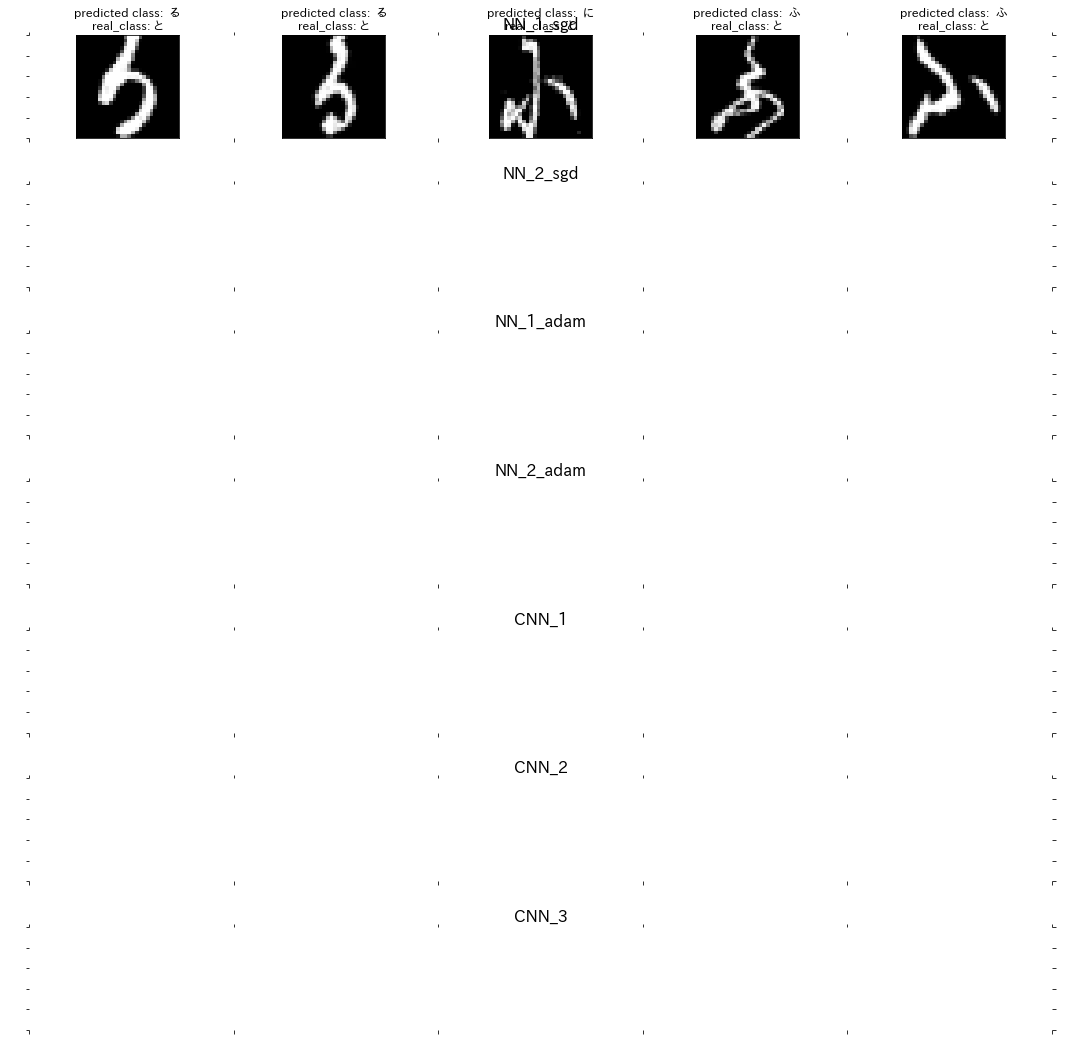

In [318]:
show_random_predictions(trained_models, 5, x_test_expanded)
# x_test_flattened = flatten(x_test_expanded)

# show_random_predictions(trained_models[0], x_test_flattened, y_test, x_test)
# show_random_predictions(trained_models[5], x_test_expanded, y_test, x_test)

---
### Carregando modelos

In [10]:
# TODO

new_nn_model.load_weights(os.path.join('weights', 'NN_1.h5'))

x_test_flattened = flatten(x_test_expanded)

loss, acc = new_nn_model.evaluate(x_test_flattened, y_test)

print('loss: %.2f - accuracy: %.2f%%' % (loss*100, acc*100))

NameError: name 'new_nn_model' is not defined